# TS Forecasting with MLP

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import keras
from keras.models import Sequential
from keras import losses
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [54]:
data = pd.read_csv('daily-minimum-temperatures-in-me.csv')
data.head(10)

,Date,Temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


In [55]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('daily-minimum-temperatures-in-me.csv', parse_dates=['Date'], date_parser=dateparse)

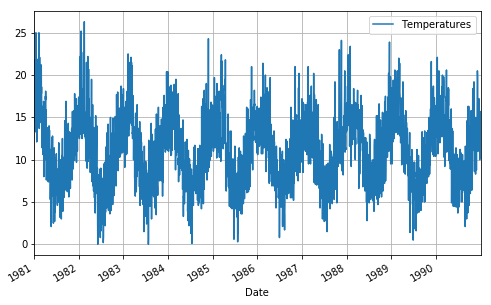

In [56]:
data.plot(x='Date', y='Temperatures', figsize=(8, 5))
plt.grid(True)

In [57]:
def data_norm(data):
    mini = min(data)
    maxi = max(data)
    return (data-mini)/(maxi-mini)

In [58]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if (end_ix > len(sequence)-1): break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
       
    return np.array(X), np.array(y)

In [59]:
step = 30

In [60]:
X, y = split_sequence(sequence=data_norm(data['Temperatures']),n_steps=step)

In [61]:
def split_data(X, y, train_size):
    x_train = X[:int(len(X)*train_size)]
    x_test = X[int(len(X)*train_size):]
    y_train = y[:int(len(y)*train_size)]
    y_test = y[int(len(y)*train_size):]
    return x_train, x_test, y_train, y_test

In [62]:
X_train, X_test, y_train, y_test = split_data(X, y, train_size=0.3)

In [11]:
def network_model():
    model = Sequential()
    
    model.add(Dense(30, input_dim=step, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    return model

In [12]:
mlp_regressor = KerasRegressor(build_fn=network_model, epochs=100, batch_size=20)

In [13]:
model = mlp_regressor.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=False)

Train on 1086 samples, validate on 2534 samples
Epoch 1/100
1086/1086 [==============================] - 0s 227us/step - loss: 0.0350 - acc: 0.0028 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 2/100
1086/1086 [==============================] - 0s 98us/step - loss: 0.0139 - acc: 0.0028 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 3/100
1086/1086 [==============================] - 0s 102us/step - loss: 0.0137 - acc: 0.0028 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 4/100
1086/1086 [==============================] - 0s 94us/step - loss: 0.0133 - acc: 0.0028 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 5/100
1086/1086 [==============================] - 0s 100us/step - loss: 0.0130 - acc: 0.0028 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 6/100
1086/1086 [==============================] - 0s 92us/step - loss: 0.0128 - acc: 0.0028 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 7/100
1086/1086 [==============================] - 0s 105us/step - loss: 0.0124 - acc: 0.0028 - val_los

In [14]:
pred = mlp_regressor.predict(X_test)

In [63]:
def MAPE(y_test, prediction):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - prediction[i]) / y_test[i]) * 100
    media_erro = soma / len(y_test)
    return media_erro.round(5)

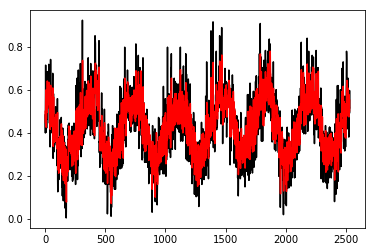

In [16]:
plt.plot(y_test, 'k')
plt.plot(pred, 'r')

In [17]:
MAPE(y_test, pred)

25.45474